# Ridge Regression
## Getting data

In [69]:
import pandas as pd
import numpy as np

sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


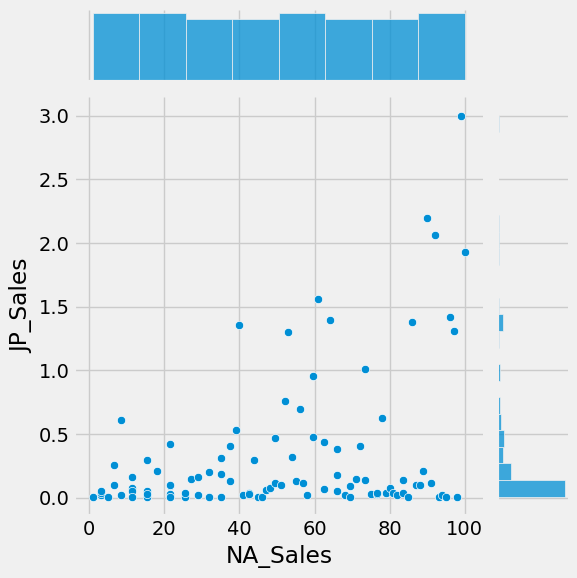

In [70]:
import seaborn as sns
s = sales[(sales.NA_Sales.notnull()  & sales.JP_Sales.notnull())]
s = sales[((sales.NA_Sales > 0) & (sales.JP_Sales > 0))]
s = s.sample(100, random_state = 0)
s = s.loc[s.NA_Sales.rank().sort_values().index]
sns.jointplot(x=s.NA_Sales.rank(), y=s.JP_Sales)

## polynomial regression

In [71]:
NA_sales_ranks = s.NA_Sales.rank().values[:, np.newaxis]
JP_sales = s.JP_Sales.values[:, np.newaxis]

In [72]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

def predict(degree):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = LinearRegression()
    clf.fit(NA_sales_ranks_poly, JP_sales)
    JP_sale_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((JP_sales.flatten(), JP_sale_predictions.flatten())).reshape((100, 2))
    return result

Text(0.5, 1.0, 'Regression with Degree 1')

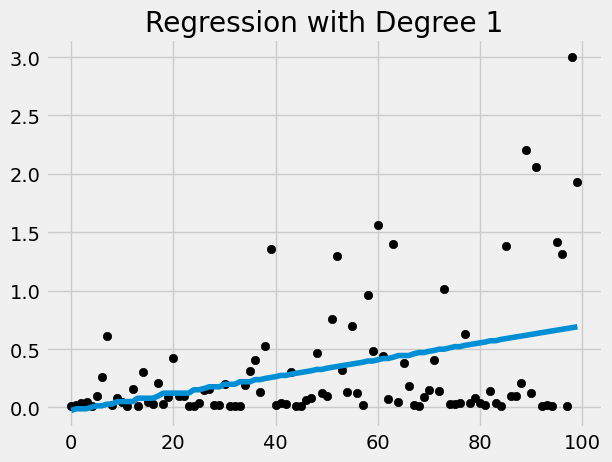

In [73]:
result = predict(1)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("Regression with Degree 1")

Text(0.5, 1.0, 'Regression with Degree 3')

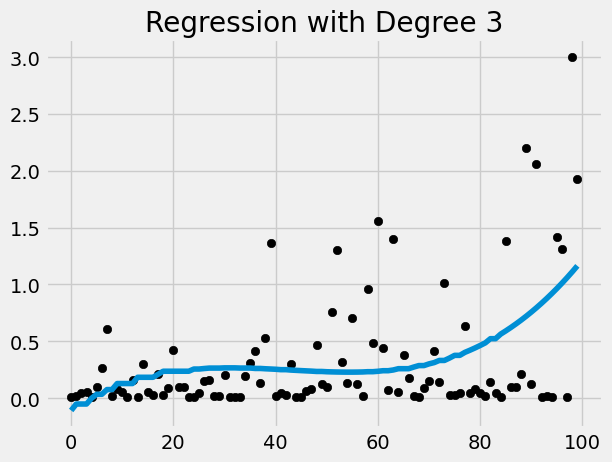

In [74]:
result = predict(3)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("Regression with Degree 3")

Text(0.5, 1.0, 'Regression with Degree 10')

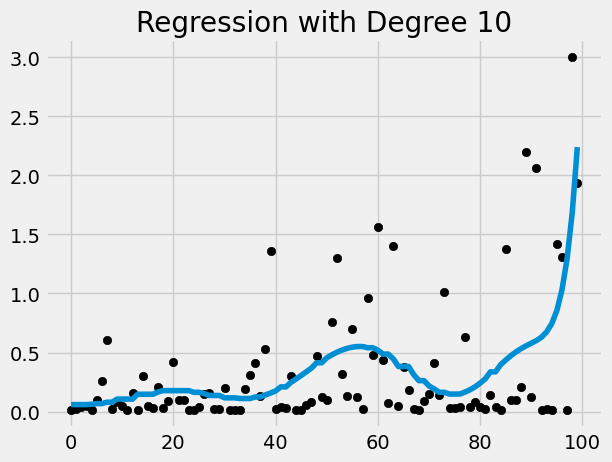

In [75]:
result = predict(10)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("Regression with Degree 10")

In [76]:
def get_model(degree):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = LinearRegression()
    clf = clf.fit(NA_sales_ranks_poly, JP_sales)
    return clf

m1_coef = get_model(1).coef_
m3_coef = get_model(3).coef_
m10_coef = get_model(10).coef_

In [77]:
m1_coef

array([[0.       , 0.0072369]])

In [78]:
m3_coef

array([[ 0.00000000e+00,  3.13757975e-02, -7.73276037e-04,
         5.89804448e-06]])

In [79]:
m10_coef

array([[ 0.00000000e+00,  6.05840984e-07,  8.75564003e-08,
         1.24860929e-06,  1.01489636e-05, -1.04866658e-06,
         4.33746803e-08, -9.20155829e-10,  1.06014486e-11,
        -6.31893422e-14,  1.52884577e-16]])

## Ridge 

In [80]:
from sklearn.linear_model import Ridge

def get_ridge_model(degree, alpha):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = Ridge(alpha = alpha)
    clf.fit(NA_sales_ranks_poly, JP_sales)
    return clf

def ridge_predict(degree, alpha):
    poly = PolynomialFeatures(degree=degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = get_ridge_model(degree, alpha)
    JP_sales_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((JP_sales.flatten(), JP_sales_predictions.flatten())).reshape((100, 2))
    return result

/Users/maximus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.12523e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'degree = 10, alpha = $10^1$')

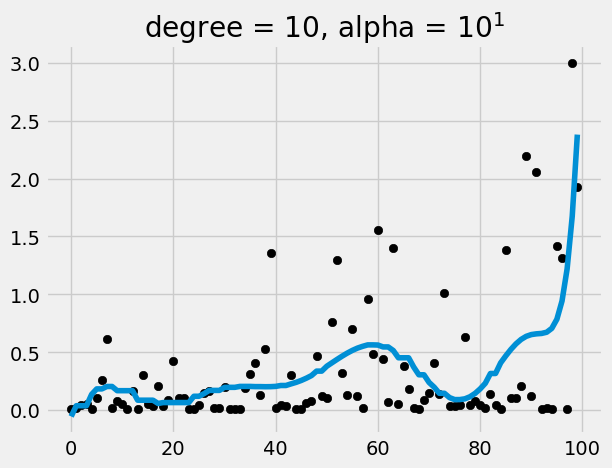

In [81]:
result = ridge_predict(10, 10)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("degree = 10, alpha = $10^1$")

/Users/maximus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.27148e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'degree = 10, alpha = $10^{19}$')

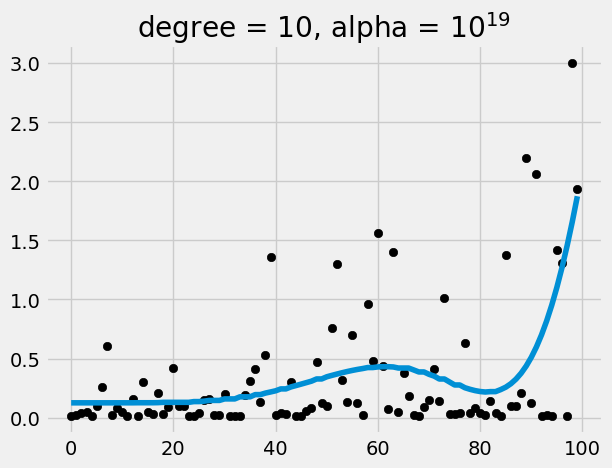

In [98]:
result = ridge_predict(10, 10**19)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("degree = 10, alpha = $10^{19}$")

In [99]:
get_ridge_model(10, 10**19).coef_

/Users/maximus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.27148e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


array([[ 0.00000000e+00,  1.79911224e-18,  9.20283325e-17,
         3.85128274e-15,  1.34185713e-13,  3.60666923e-12,
         5.82088865e-11, -2.78135835e-13, -3.13587223e-14,
         4.72563973e-16, -1.87660698e-18]])